## Cars.com

In [ ]:
#cars

df

# reddit

df_reddit

#edmunds

df_edmunds

#youtube
df_youtube

#fan club
df_fan

In [28]:
df = df.drop(['Year','Title','date','author','location','length','sentiment_score','sentiment'],axis=1)

In [30]:
df_reddit=df_reddit.drop(['length','sentiment_score','sentiment'],axis=1)

In [32]:
df_edmunds=df_edmunds.drop(['Year','length','sentiment_score','sentiment'],axis=1)

In [34]:
df_youtube=df_youtube.drop(['Video Title','length','sentiment_score','sentiment'],axis=1)
df_youtube

,Model Name,Comment
0,Nissan Ariya,Nice to see more EV’s entering the market
1,Nissan Ariya,"I test drove this car, it's pretty amazing"
2,Nissan Ariya,"I was really interested in this car, but could..."
3,Nissan Ariya,Love the video man. I'm hopping you get to rev...
4,Nissan Ariya,Great Review!!! Thanks
...,...,...
2752386,Honda Prologue,The Prologue is not a replacement for the CR-V...
2752387,Honda Prologue,I like blue\n
2752388,Honda Prologue,Hurry before no bran honda anymore\n
2752389,Honda Prologue,Choice's\n


In [36]:
df_fan=df_fan.drop(['Title','length','sentiment_score','sentiment'],axis=1)

In [58]:
df_youtube['Model Name'].unique()

array(['Nissan Ariya', 'Ford Mustang Mach-E', 'Hyundai Ioniq 5',
       'Kia EV6', 'Tesla Model Y', 'VW ID.4', 'Toyota bZ4X'], dtype=object)

In [72]:
# Nissan Ariya, Toyoya bZ4X, Kia EV6, VW id.4, Hyundai Ioniq 5, Ford Mustang Mach-3, Tesla Model Y.

# 'Nissan Ariya', 'Ford Mustang Mach-E', 'Hyundai Ioniq 5',
#  'Kia EV6', 'Tesla Model Y', 'VW ID.4', 'Toyota bZ4X'
# define the replacement mapping
replacement_map = {'tesla+model-y': 'Tesla Model Y', 'volkswagen+id4': 'VW ID.4', 'hyundai+ioniq-5': 'Hyundai Ioniq 5', 'kia+ev6': 'Kia EV6', 'ariya': 'Nissan Ariya',
                  'ford+mustang+mach+e': 'Ford Mustang Mach-E','toyota+bz4x':'Toyota bZ4X'}

# replace the values in the 'model' column
df_fan['Model'] = df_fan['Model'].replace(replacement_map)

In [79]:
# define a list of new header names
new_headers = ['Model', 'Comment']

# assign the new header names to the dataframe
df_reddit.columns = new_headers

In [81]:
df_combined=pd.concat([df,df_fan,df_youtube,df_edmunds,df_reddit])
df_combined.to_csv("/Users/zihanfang/Desktop/car_website_data/Model_Combined_Data.csv")

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/data_with_location.csv')

# import re

# # Define the regex pattern to match the state information
# pattern = r',\s+([A-Z]{2,})$'

# # Use the regex pattern to extract the state information from each string in the "source" column
# states = []
# for source in df['author']:
#     match = re.search(pattern, source)
#     if match:
#         states.append(match.group(1))
#     else:
#         states.append('')

# # Add the states as a new column to the DataFrame
# df['location'] = states

# # Save the updated DataFrame to a new CSV file
# df.to_csv('data_with_location.csv', index=False)


# Explore the data
print(df.head())
print(df.info())

# Clean the data
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

   Year        Model                                  Title       date  \
0  2018  nissan-leaf             NO MORE GAS OR OIL CHANGES   2-Apr-22   
1  2018  nissan-leaf  I will never go back to gasoline cars  16-Sep-20   
2  2018  nissan-leaf                     Nice electric car.   8-Jul-20   
3  2018  nissan-leaf  Great reliable economical family car.   2-Dec-19   
4  2018  nissan-leaf                           Love My Leaf  16-Aug-19   

                                 author  \
0  By DAVE BLAKMON from SEABROOK, TEXAS   
1        By German S. from Bellevue, WA   
2            By Jeffs82. from Eagan, NN   
3            By Dudamus from Birmingham   
4   By 625elizabeth from Birmingham, AL   

                                             Reviews location  
0    I BOUGHT A 2018 LEAF SL NEW IN OCTOBER 2018....    TEXAS  
1  Wanted to get an EV but very few options offer...       WA  
2  I have owned a couple of leafs. This is my fir...       NN  
3  We love the LEAF.  With thousands of 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


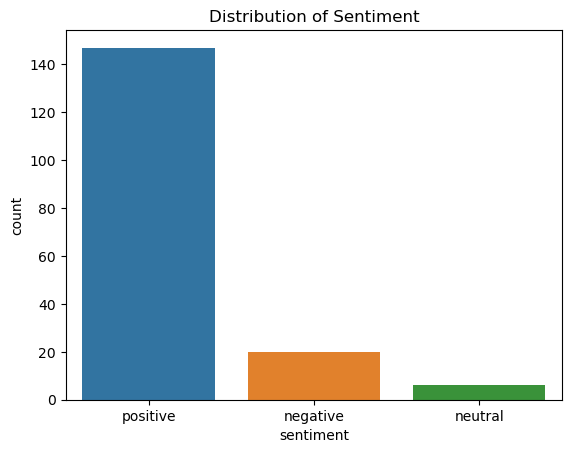

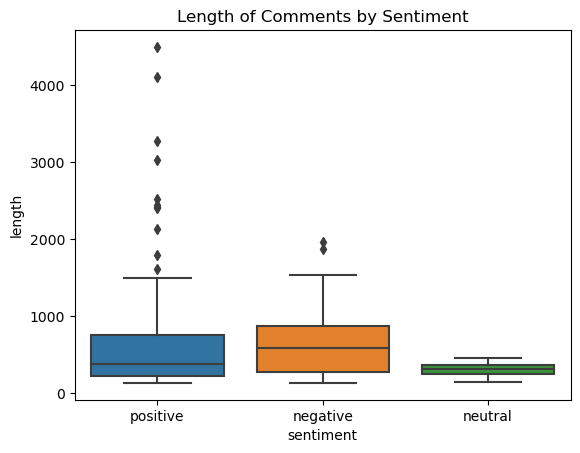

t-statistic: -0.4289026206365561
p-value: 0.6685535406490437


In [2]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Visualize the data
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiment')
plt.show()



# Calculate the length of each comment
df['length'] = df['Reviews'].apply(len)

# Group the data by sentiment and calculate the mean length for each group
sentiment_lengths = df.groupby('sentiment')['length'].mean()
sns.boxplot(x='sentiment', y='length', data=df)
plt.title('Length of Comments by Sentiment')
plt.show()

t_stat, p_val = stats.ttest_ind(df[df['sentiment']=='positive']['length'], df[df['sentiment']=='negative']['length'])
print('t-statistic:', t_stat)
print('p-value:', p_val)

**p-value> 0.05: There is no significant difference in the mean comment length between the positive and negative sentiment groups**

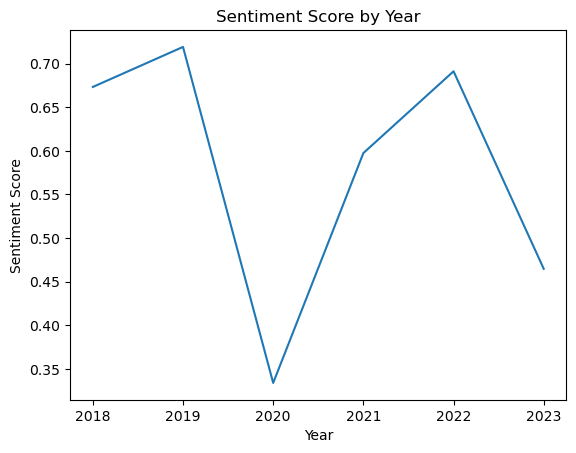

In [3]:
# Group the data by year and calculate the mean sentiment score for each year
yearly_sentiment = df.groupby('Year')['sentiment_score'].mean()
import matplotlib.pyplot as plt
# Create a line plot
plt.plot(yearly_sentiment.index, yearly_sentiment.values)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Year')
plt.show()

## The negative comments for EV go up recently

    Year                 Model  sentiment_score
14  2022  ford-f_150_lightning         0.883267
9   2021   ford-mustang_mach_e         0.365700
15  2022   ford-mustang_mach_e         0.919350
23  2023   ford-mustang_mach_e         0.958300
16  2022       hyundai-ioniq_5         0.765700
24  2023       hyundai-ioniq_5         0.932967
2   2019       hyundai-kona_ev         0.741367
5   2020       hyundai-kona_ev         0.454950
10  2021       hyundai-kona_ev         0.972600
17  2022               kia-ev6         0.660633
25  2023          nissan-ariya         0.973300
0   2018           nissan-leaf         0.745225
3   2019           nissan-leaf         0.700829
6   2020           nissan-leaf         0.789200
18  2022           nissan-leaf         0.390733
19  2022            rivian-r1t         0.983000
1   2018         tesla-model_3         0.657152
4   2019         tesla-model_3         0.733492
7   2020         tesla-model_3         0.252060
11  2021         tesla-model_3         0

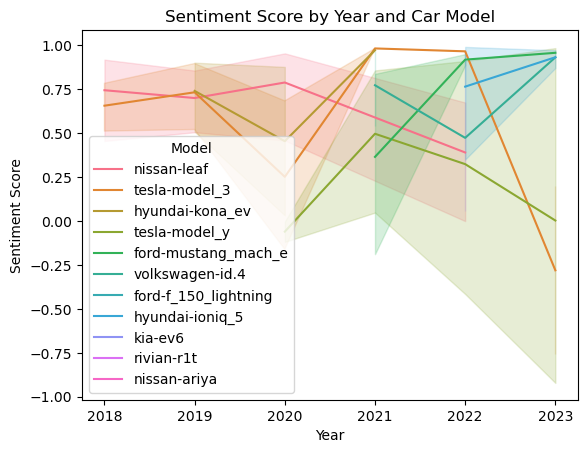

In [4]:
yearly_sentiment = df.groupby(['Year', 'Model'])['sentiment_score'].mean()

yearly_sentiment_df = pd.DataFrame(yearly_sentiment).reset_index().sort_values(by=['Model', 'Year'])
print(yearly_sentiment_df)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot with a different line for each car model
sns.lineplot(x='Year', y='sentiment_score', hue='Model', data=df)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Year and Car Model')
# Show the plot
plt.show()

#Tesla model 3 has the most bad reviews and Kia EV6 has a much higher score. Then is ford mustang, then is hyundai

## Reddit

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df_reddit = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/comments_reddit.csv')

print(df_reddit.head())
print(df_reddit.info())

# Clean the data
df_reddit.drop_duplicates(inplace=True)
df_reddit.dropna(inplace=True)

          subreddit                                            Reviews
0  electricvehicles  Rivian is getting there.  Latest update lets y...
1  electricvehicles                   Not Hyundai or Chevy, they suck.
2  electricvehicles                                   Not Nissan or VW
3  electricvehicles  I hate that we feel the need to acknowledge Te...
4  electricvehicles  I both don’t care at all but also can’t unders...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212927 entries, 0 to 212926
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   subreddit  212927 non-null  object
 1   Reviews    212927 non-null  object
dtypes: object(2)
memory usage: 3.2+ MB
None


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


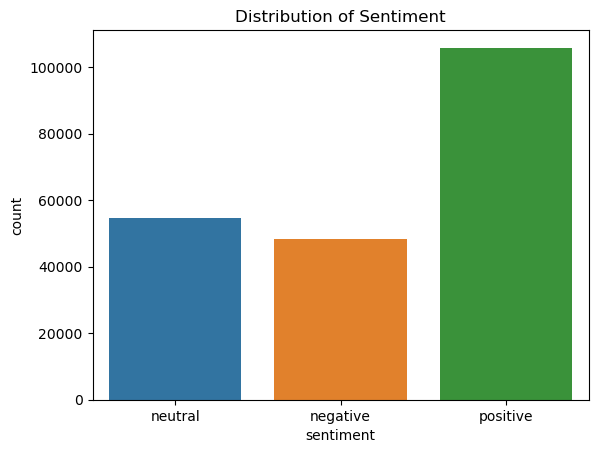

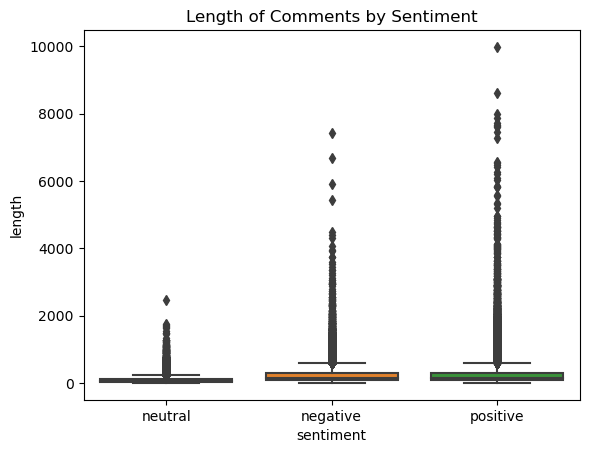

t-statistic: 5.4184022862380345
p-value: 6.022384967092848e-08


In [7]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df_reddit['sentiment_score'] = df_reddit['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_reddit['sentiment'] = df_reddit['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Visualize the data
sns.countplot(x='sentiment', data=df_reddit)
plt.title('Distribution of Sentiment')
plt.show()



# Calculate the length of each comment
df_reddit['length'] = df_reddit['Reviews'].apply(len)

# Group the data by sentiment and calculate the mean length for each group
sentiment_lengths = df_reddit.groupby('sentiment')['length'].mean()
sns.boxplot(x='sentiment', y='length', data=df_reddit)
plt.title('Length of Comments by Sentiment')
plt.show()

t_stat_r, p_val_r = stats.ttest_ind(df_reddit[df_reddit['sentiment']=='positive']['length'], df_reddit[df_reddit['sentiment']=='negative']['length'])
print('t-statistic:', t_stat_r)
print('p-value:', p_val_r)

**p-value> 0.05: There is significant difference in the mean comment length between the positive and negative sentiment groups**

           subreddit  sentiment_score
16  electricvehicles         0.157342
13        ToyotaBZ4x         0.161214
11       TeslaModel3         0.162750
3             KiaEV6         0.170071
18              leaf         0.173410
12       TeslaModelY         0.173754
4          KiaNiroEV         0.174552
17              f150         0.174823
2           HummerEV         0.178591
14       VWiD4Owners         0.180074
15     VolkswagenID4         0.187935
0             BoltEV         0.191503
9             SoulEV         0.204947
1          ChevyBolt         0.206149
8           Solterra         0.207716
5            Mustang         0.212312
6        NissanAriya         0.238849
10    SubaruSolterra         0.247973
7          RivianR1T         0.295669


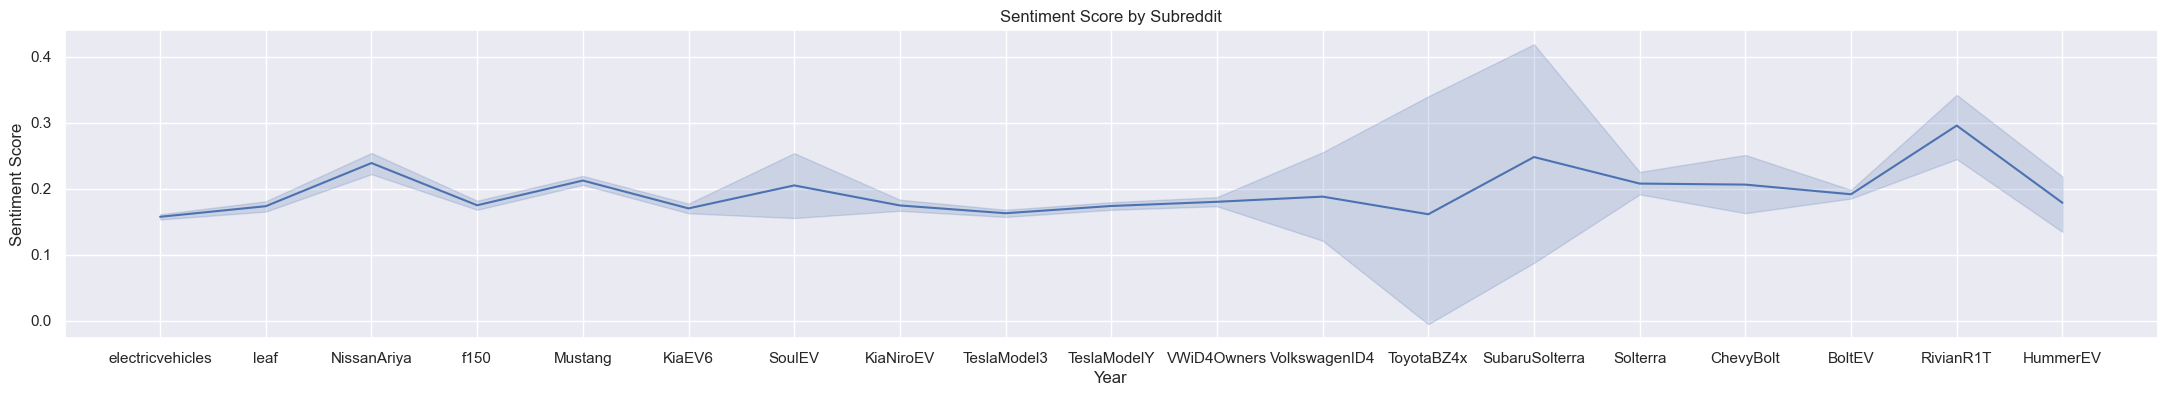

In [8]:
reddit_sentiment = df_reddit.groupby(['subreddit'])['sentiment_score'].mean()

reddit_sentiment_df = pd.DataFrame(reddit_sentiment).reset_index().sort_values(by=['sentiment_score'])
print(reddit_sentiment_df)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(27,4)})
# Create a line plot with a different line for each car model
sns.lineplot(x='subreddit', y='sentiment_score',data=df_reddit)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Subreddit')
# Show the plot
plt.show()

**shaded region for BZ4X and Solterra large, and there is low confidence in the estimated mean score.** 

## Edmunds

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df_edmunds = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/reviews_edmunds.csv')

print(df_edmunds.head())
print(df_edmunds.info())

# Clean the data
df_edmunds.drop_duplicates(inplace=True)
df_edmunds.dropna(inplace=True)

   Year            Model                                            Reviews
0  2023      nissan/leaf  We purchased a SL Plus a few months ago.  Its ...
1  2021   volkswagen/id4  Goods:\nIt rides almost well and comfortable. ...
2  2022  hyundai/ioniq-5  Bought the car in early December - sight unsee...
3  2022    tesla/model-y  After a short drive in a Model S a number of y...
4  2021   volkswagen/id4  I've had my ID4 for two months and have not dr...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227 entries, 0 to 1226
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     1227 non-null   int64 
 1   Model    1227 non-null   object
 2   Reviews  1227 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.9+ KB
None


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


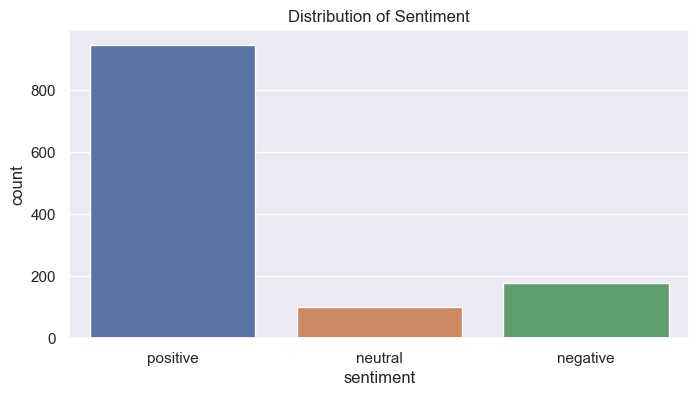

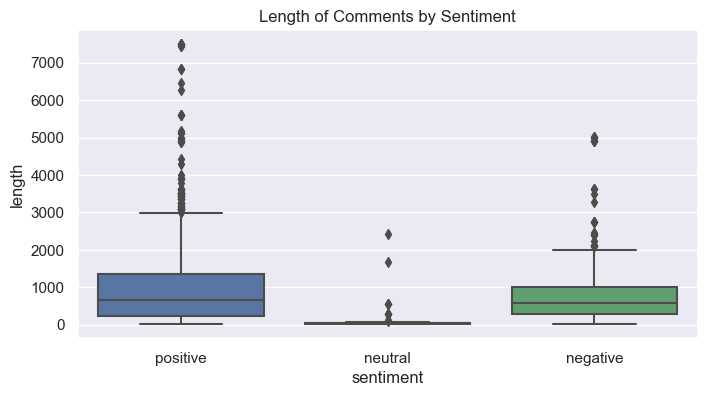

t-statistic: 0.9223843760570505
p-value: 0.35652606168515


In [10]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df_edmunds['sentiment_score'] = df_edmunds['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_edmunds['sentiment'] = df_edmunds['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
sns.set(rc={'figure.figsize':(8,4)})
# Visualize the data
sns.countplot(x='sentiment', data=df_edmunds)
plt.title('Distribution of Sentiment')
plt.show()



# Calculate the length of each comment
df_edmunds['length'] = df_edmunds['Reviews'].apply(len)

# Group the data by sentiment and calculate the mean length for each group
sentiment_lengths = df_edmunds.groupby('sentiment')['length'].mean()
sns.boxplot(x='sentiment', y='length', data=df_edmunds)
plt.title('Length of Comments by Sentiment')
plt.show()

t_stat_e, p_val_e = stats.ttest_ind(df_edmunds[df_edmunds['sentiment']=='positive']['length'], df_edmunds[df_edmunds['sentiment']=='negative']['length'])
print('t-statistic:', t_stat_e)
print('p-value:', p_val_e)

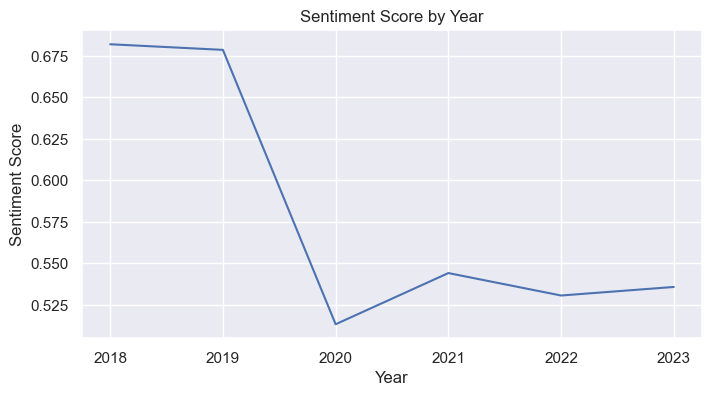

In [11]:
# Group the data by year and calculate the mean sentiment score for each year
yearly_sentiment_edmunds = df_edmunds.groupby('Year')['sentiment_score'].mean()
import matplotlib.pyplot as plt
# Create a line plot
plt.plot(yearly_sentiment_edmunds.index, yearly_sentiment_edmunds.values)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Year')
plt.show()

## The negative comments for EV go up recently

    Year                 Model  sentiment_score
12  2022  ford/f-150-lightning         0.720950
21  2023  ford/f-150-lightning         0.719375
7   2021   ford/mustang-mach-e         0.655545
13  2022   ford/mustang-mach-e         0.728200
22  2023   ford/mustang-mach-e         0.667406
14  2022       hyundai/ioniq-5         0.475248
23  2023       hyundai/ioniq-5         0.544289
15  2022               kia/ev6         0.467341
24  2023               kia/ev6         0.454837
25  2023          nissan/ariya         0.491425
0   2018           nissan/leaf         0.582384
2   2019           nissan/leaf         0.580559
4   2020           nissan/leaf         0.561873
8   2021           nissan/leaf         0.567336
16  2022           nissan/leaf         0.508369
26  2023           nissan/leaf         0.492964
17  2022            rivian/r1t         0.318150
27  2023       subaru/solterra         0.055167
1   2018         tesla/model-3         0.712428
3   2019         tesla/model-3         0

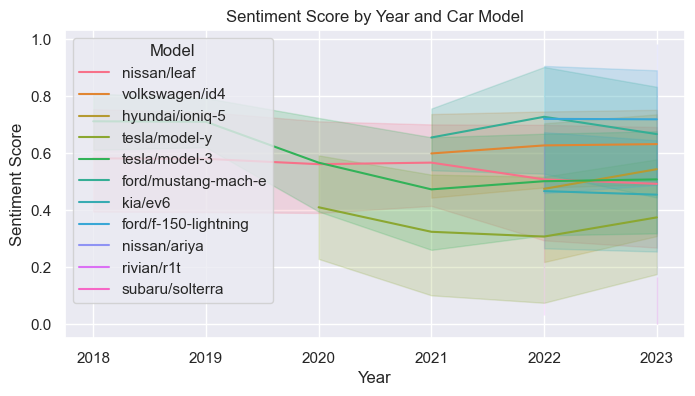

In [12]:
model_sentiment_edmunds = df_edmunds.groupby(['Year', 'Model'])['sentiment_score'].mean()

yearly_sentiment_edmunds = pd.DataFrame(model_sentiment_edmunds).reset_index().sort_values(by=['Model', 'Year'])
print(yearly_sentiment_edmunds)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line plot with a different line for each car model
sns.lineplot(x='Year', y='sentiment_score', hue='Model', data=df_edmunds)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Year and Car Model')
# Show the plot
plt.show()

#leaf is relative high, model y has relatively most negative comments.

## nissanzclub

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
df_fan = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/reviews_fanclub.csv')

print(df_fan.head())
print(df_fan.info())

# Clean the data
df_fan.drop_duplicates(inplace=True)
df_fan.dropna(inplace=True)

  Model                       Title  \
0  leaf  Finally saw an Ariya today   
1  leaf  Finally saw an Ariya today   
2  leaf  Finally saw an Ariya today   
3  leaf  Finally saw an Ariya today   
4  leaf  Finally saw an Ariya today   

                                             Reviews  
0  \nI have an Ariya in my showroom. Lady put a d...  
1  \nWhat's the story on the financing, way too h...  
2  \nI have an Ariya in my showroom. Lady put a d...  
3  \nWhat's the story on the financing, way too h...  
4  \nI have an Ariya in my showroom. Lady put a d...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23835 entries, 0 to 23834
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Model    23835 non-null  object
 1   Title    23835 non-null  object
 2   Reviews  23835 non-null  object
dtypes: object(3)
memory usage: 558.8+ KB
None


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


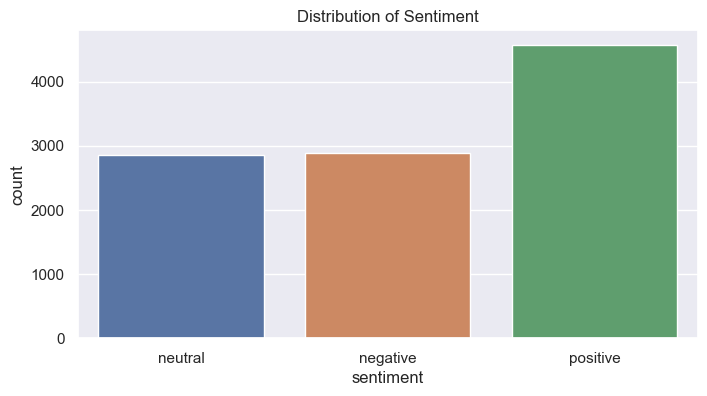

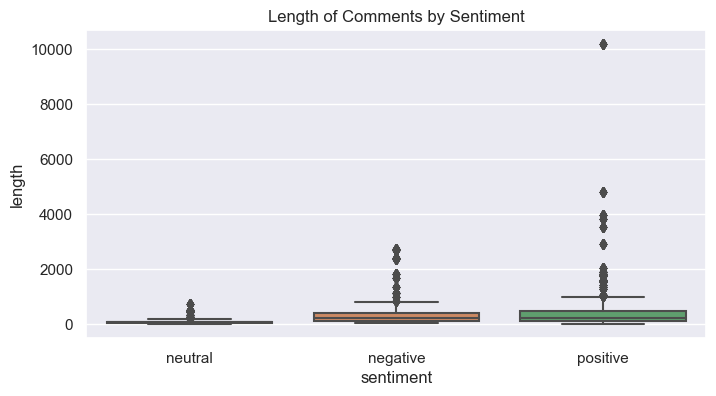

t-statistic: 5.429957972894398
p-value: 5.814391629263611e-08


In [14]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df_fan['sentiment_score'] = df_fan['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_fan['sentiment'] = df_fan['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
sns.set(rc={'figure.figsize':(8,4)})
# Visualize the data
sns.countplot(x='sentiment', data=df_fan)
plt.title('Distribution of Sentiment')
plt.show()



# Calculate the length of each comment
df_fan['length'] = df_fan['Reviews'].apply(len)

# Group the data by sentiment and calculate the mean length for each group
sentiment_lengths = df_fan.groupby('sentiment')['length'].mean()
sns.boxplot(x='sentiment', y='length', data=df_fan)
plt.title('Length of Comments by Sentiment')
plt.show()

t_stat_f, p_val_f = stats.ttest_ind(df_fan[df_fan['sentiment']=='positive']['length'], df_fan[df_fan['sentiment']=='negative']['length'])
print('t-statistic:', t_stat_f)
print('p-value:', p_val_f)

                   Model  sentiment_score
16         tesla+model-3         0.114064
4         honda+prologue         0.115016
14            rivian+r1t         0.116877
19           toyota+bz4x         0.116877
20        volkswagen+id4         0.117115
1             chevy+bolt         0.117115
2   ford+f-150+lightning         0.117115
17         tesla+model-y         0.117115
5              hummer+ev         0.117115
15       subaru+solterra         0.117115
13                  leaf         0.117115
11               kia+ev4         0.117115
10               kia+ev3         0.117313
12               kia+ev6         0.118139
18           toyota+bz3x         0.118220
7        hyundai+ioniq-4         0.118347
9        hyundai+kona-ev         0.118398
8        hyundai+ioniq-5         0.119021
0                  ariya         0.119021
6        hyundai+ioniq-3         0.119240
3    ford+mustang+mach+e         0.119448


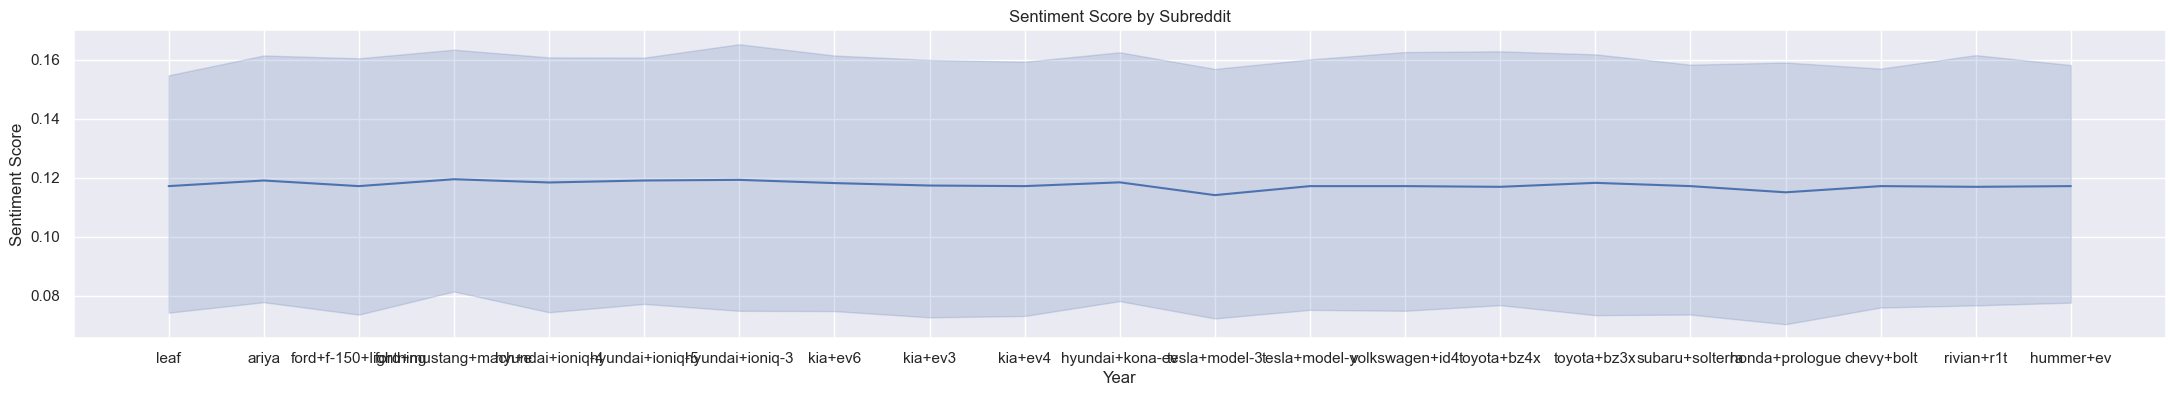

In [15]:
fan_sentiment = df_fan.groupby(['Model'])['sentiment_score'].mean()

fan_sentiment_df = pd.DataFrame(fan_sentiment).reset_index().sort_values(by=['sentiment_score'])
print(fan_sentiment_df)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(27,4)})
# Create a line plot with a different line for each car model
sns.lineplot(x='Model', y='sentiment_score',data=df_fan)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Subreddit')
# Show the plot
plt.show()

## Youtube

In [16]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Load the data
df_youtube = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/youtube_comment.csv')

In [17]:

print(df_youtube.head())
print(df_youtube.info())

# Clean the data
df_youtube.drop_duplicates(inplace=True)

     Model Name  Video Title  \
0  Nissan Ariya          NaN   
1  Nissan Ariya          NaN   
2  Nissan Ariya          NaN   
3  Nissan Ariya          NaN   
4  Nissan Ariya          NaN   

                                             Comment  
0          Nice to see more EV’s entering the market  
1         I test drove this car, it's pretty amazing  
2  I was really interested in this car, but could...  
3  Love the video man. I'm hopping you get to rev...  
4                             Great Review!!! Thanks  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752391 entries, 0 to 2752390
Data columns (total 3 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Model Name   object 
 1   Video Title  float64
 2   Comment      object 
dtypes: float64(1), object(2)
memory usage: 63.0+ MB
None


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


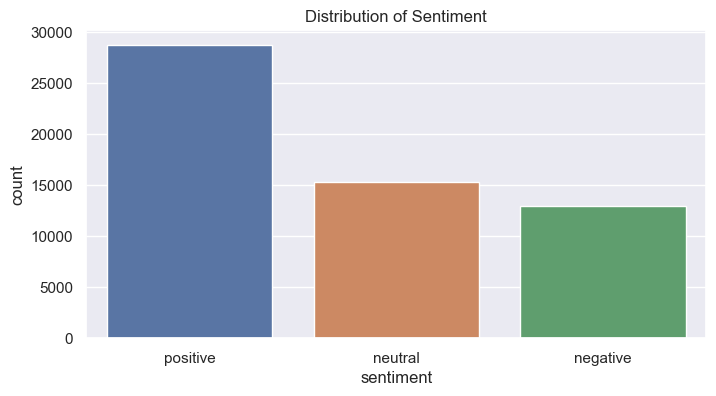

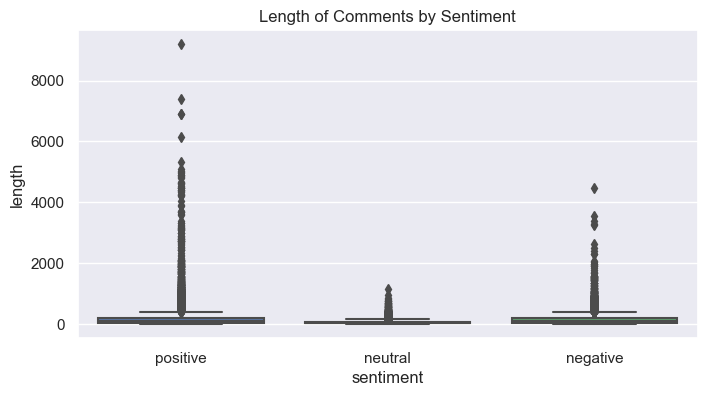

t-statistic: 6.1080093910114615
p-value: 1.0177042568251378e-09


In [18]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df_youtube['sentiment_score'] = df_youtube['Comment'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_youtube['sentiment'] = df_youtube['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
sns.set(rc={'figure.figsize':(8,4)})
# Visualize the data
sns.countplot(x='sentiment', data=df_youtube)
plt.title('Distribution of Sentiment')
plt.show()



# Calculate the length of each comment
df_youtube['length'] = df_youtube['Comment'].apply(len)

# Group the data by sentiment and calculate the mean length for each group
sentiment_lengths = df_youtube.groupby('sentiment')['length'].mean()
sns.boxplot(x='sentiment', y='length', data=df_youtube)
plt.title('Length of Comments by Sentiment')
plt.show()

t_stat_f, p_val_f = stats.ttest_ind(df_youtube[df_youtube['sentiment']=='positive']['length'], df_youtube[df_youtube['sentiment']=='negative']['length'])
print('t-statistic:', t_stat_f)
print('p-value:', p_val_f)

             Model Name  sentiment_score
7               Kia EV3         0.049875
17          Toyota bZ4X         0.082970
4       Hyundai Ioniq 3         0.096906
8               Kia EV4         0.119175
9               Kia EV6         0.119964
13      Subaru Solterra         0.124258
2   Ford Mustang Mach-E         0.159468
1   Ford F150 Lightning         0.168230
11         Nissan Ariya         0.178950
5       Hyundai Ioniq 4         0.179146
12          Nissan Leaf         0.212861
6       Hyundai Ioniq 5         0.213779
10              Kona EV         0.217661
14        Tesla Model 3         0.226477
0      Chevy Equinox EV         0.229810
15        Tesla Model Y         0.234891
18              VW ID.4         0.238486
3        Honda Prologue         0.252398
16          Toyota bZ3X         0.264025


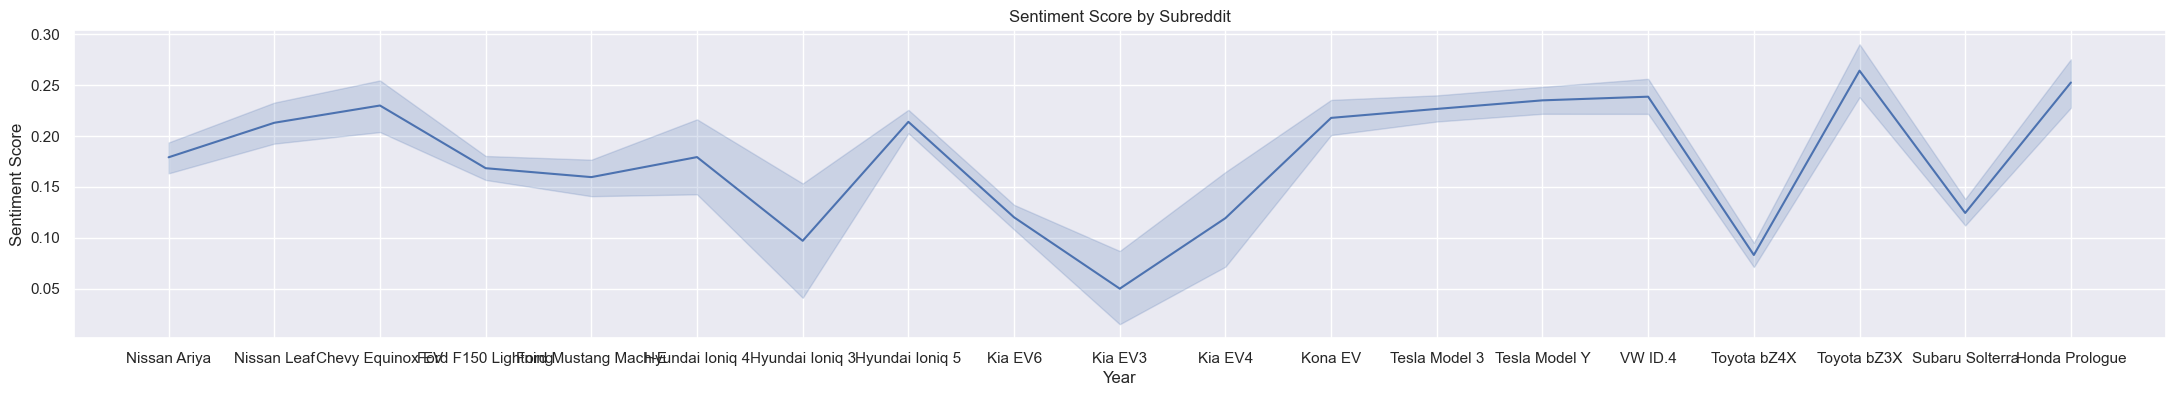

In [19]:
youtube_sentiment =df_youtube.groupby(['Model Name'])['sentiment_score'].mean()

youtube_sentiment_df = pd.DataFrame(youtube_sentiment).reset_index().sort_values(by=['sentiment_score'])
print(youtube_sentiment_df)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(27,4)})
# Create a line plot with a different line for each car model
sns.lineplot(x='Model Name', y='sentiment_score',data=df_youtube)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Subreddit')
# Show the plot
plt.show()

## Combined Comments

In [20]:
## Combine the Edmunds and Cars.com
df_car=df.drop(['Title', 'date','author','location'], axis=1)

In [21]:
df_ec = pd.concat([df_car, df_edmunds])
df_ec['Model'] = df_ec['Model'].str.replace('-', '').str.replace('_', '').str.replace('/', '').str.replace('.', '')

/var/folders/b9/xvth5z3d0g725rzpttbd7rc80000gn/T/ipykernel_26705/428565917.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ec['Model'] = df_ec['Model'].str.replace('-', '').str.replace('_', '').str.replace('/', '').str.replace('.', '')


In [22]:
# Explore the data
print(df_ec.head())
print(df_ec.info())

# Clean the data
df_ec.drop_duplicates(inplace=True)
df_ec.dropna(inplace=True)
# Remove duplicate column labels
df_ec = df_ec.reset_index()

# Check for duplicate index labels
print(df_ec.index.duplicated())

    Year       Model                                            Reviews  \
0   2018  nissanleaf    I BOUGHT A 2018 LEAF SL NEW IN OCTOBER 2018....   
1   2018  nissanleaf  Wanted to get an EV but very few options offer...   
2   2018  nissanleaf  I have owned a couple of leafs. This is my fir...   
4   2018  nissanleaf  I’ve only had it 3 days! Love it! Smooth drivi...   
10  2018  nissanleaf  I really enjoy driving this car. It is perfect...   

    sentiment_score sentiment  length  
0            0.9177  positive     498  
1            0.8047  positive     346  
2            0.8074  positive     267  
4            0.9605  positive     225  
10           0.9883  positive     406  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1226
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             1400 non-null   int64  
 1   Model            1400 non-null   object 
 2   Reviews       

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


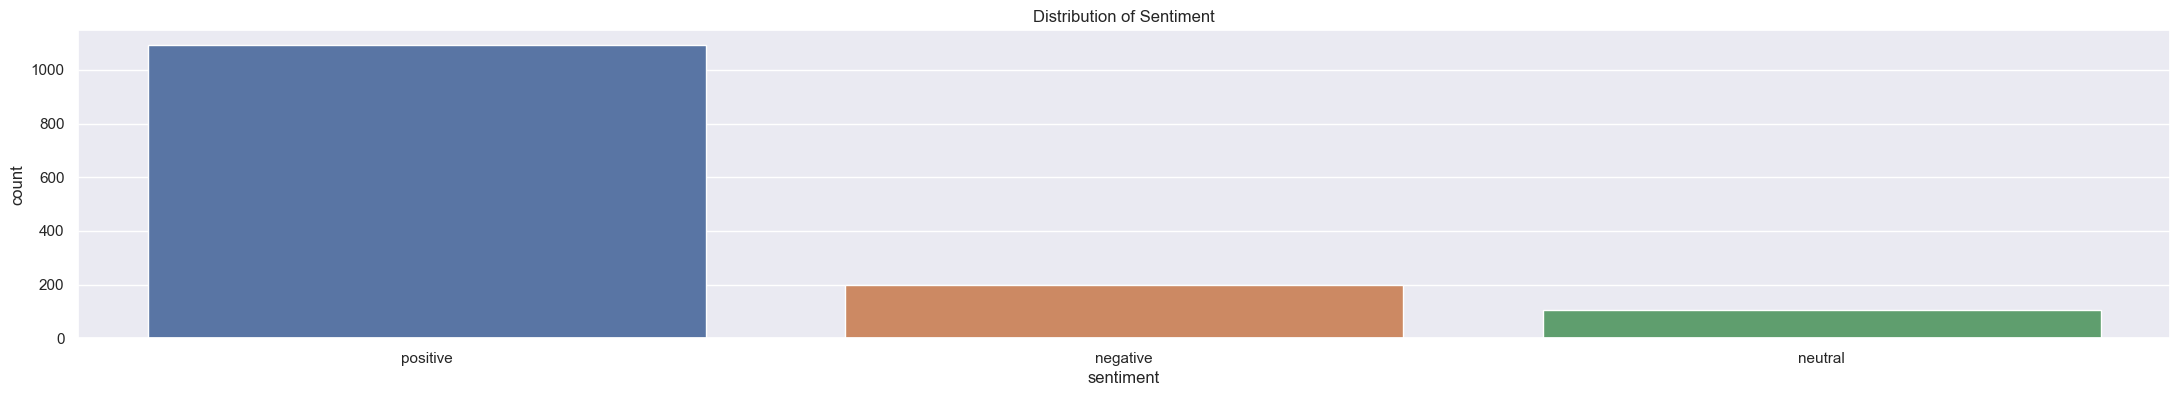

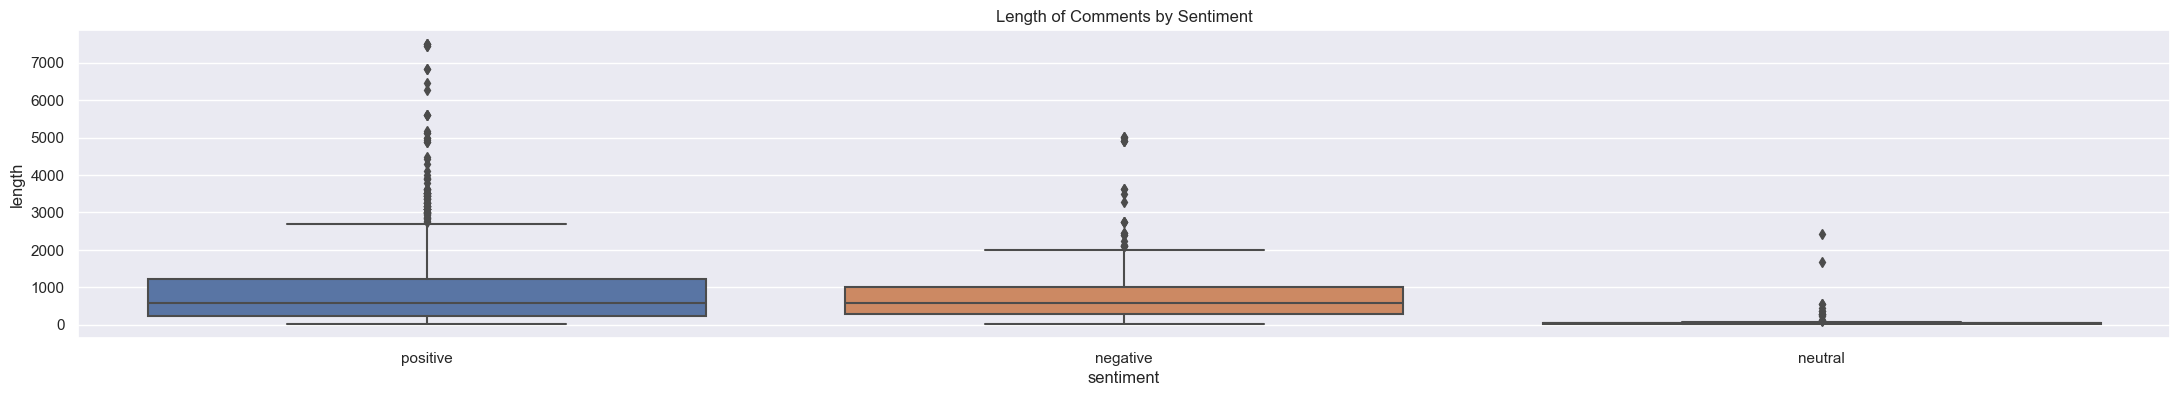

t-statistic: 0.6810248103345609
p-value: 0.4959780164518761


In [23]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df_ec['sentiment_score'] = df_ec['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_ec['sentiment'] = df_ec['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))

# Visualize the data
sns.countplot(x='sentiment', data=df_ec)
plt.title('Distribution of Sentiment')
plt.show()



# Calculate the length of each comment
df_ec['length'] = df_ec['Reviews'].apply(len)

# Group the data by sentiment and calculate the mean length for each group
sentiment_lengths = df_ec.groupby('sentiment')['length'].mean()
sns.boxplot(x='sentiment', y='length', data=df_ec)
plt.title('Length of Comments by Sentiment')
plt.show()

t_stat_ec, p_val_ec = stats.ttest_ind(df_ec[df_ec['sentiment']=='positive']['length'], df_ec[df_ec['sentiment']=='negative']['length'])
print('t-statistic:', t_stat_ec)
print('p-value:', p_val_ec)

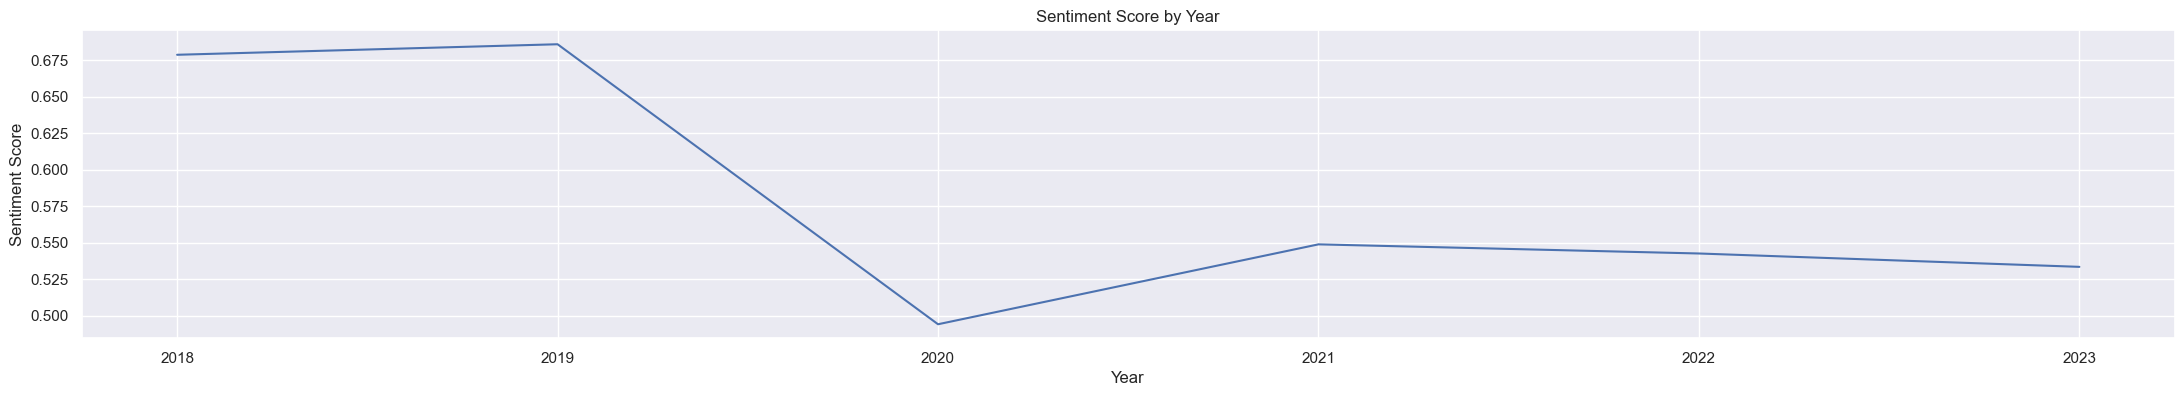

In [24]:
yearly_sentiment_ec = df_ec.groupby('Year')['sentiment_score'].mean()
import matplotlib.pyplot as plt
# Create a line plot
plt.plot(yearly_sentiment_ec.index, yearly_sentiment_ec.values)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Year')
plt.show()

## The negative comments for EV go up recently

    Year              Model  sentiment_score
15  2022  fordf150lightning         0.768767
24  2023  fordf150lightning         0.719375
9   2021   fordmustangmache         0.635205
16  2022   fordmustangmache         0.740943
25  2023   fordmustangmache         0.676497
17  2022      hyundaiioniq5         0.508762
26  2023      hyundaiioniq5         0.583157
2   2019      hyundaikonaev         0.741367
5   2020      hyundaikonaev         0.454950
10  2021      hyundaikonaev         0.972600
18  2022             kiaev6         0.496335
27  2023             kiaev6         0.454837
28  2023        nissanariya         0.587800
0   2018         nissanleaf         0.635197
3   2019         nissanleaf         0.615637
6   2020         nissanleaf         0.576081
11  2021         nissanleaf         0.567336
19  2022         nissanleaf         0.498286
29  2023         nissanleaf         0.492964
20  2022          rivianr1t         0.413129
30  2023     subarusolterra         0.055167
1   2018  

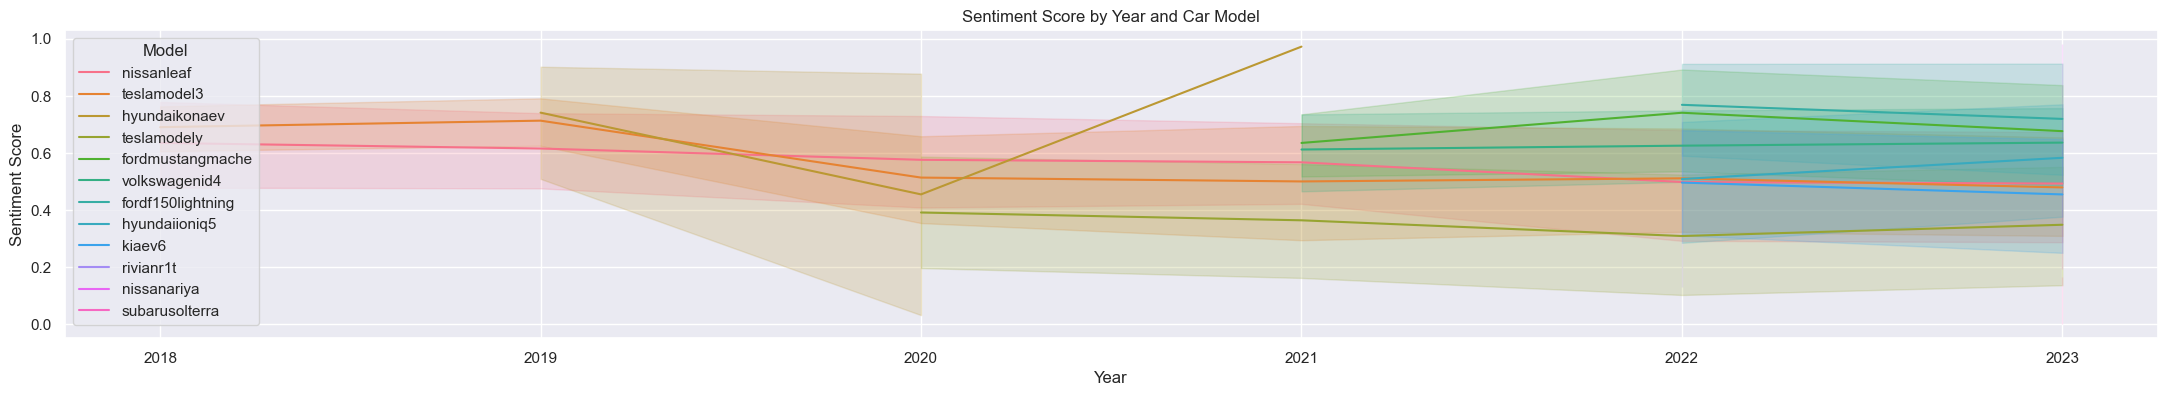

In [25]:
yearly_sentiment_ec = df_ec.groupby(['Year', 'Model'])['sentiment_score'].mean()

yearly_sentiment_ec = pd.DataFrame(yearly_sentiment_ec).reset_index().sort_values(by=['Model', 'Year'])
print(yearly_sentiment_ec)
import seaborn as sns
import matplotlib.pyplot as plt


# Create a line plot with a different line for each car model
sns.lineplot(x='Year', y='sentiment_score', hue='Model', data=df_ec)
plt.xlabel('Year')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Year and Car Model')
# Show the plot
plt.show()

#Tesla model 3 has the most bad reviews and Kia EV6 has a much higher score. Then is ford mustang, then is hyundai

In [98]:
#Combine all comments together

df_combined=pd.concat([df_ec.drop(['Year', 'Model','index'], axis=1),df_reddit.drop(['subreddit'],axis=1)])

df_combined=pd.concat([df_combined,df_fan.drop(['Title'],axis=1)])

In [99]:
# Explore the data
print(df_combined.head())
print(df_combined.info())

# Clean the data
df_combined.drop_duplicates(inplace=True)
df_combined.dropna(inplace=True)
# Remove duplicate column labels
df_combined = df_combined.reset_index()

# Check for duplicate index labels
print(df_combined.index.duplicated())

                                             Reviews  sentiment_score  \
0    I BOUGHT A 2018 LEAF SL NEW IN OCTOBER 2018....           0.9177   
1  Wanted to get an EV but very few options offer...           0.8047   
2  I have owned a couple of leafs. This is my fir...           0.8074   
3  We love the LEAF.  With thousands of free char...           0.8898   
4  I’ve only had it 3 days! Love it! Smooth drivi...           0.9605   

  sentiment  length Model  
0  positive     498   NaN  
1  positive     346   NaN  
2  positive     267   NaN  
3  positive     605   NaN  
4  positive     225   NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 220419 entries, 0 to 23834
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Reviews          220419 non-null  object 
 1   sentiment_score  220419 non-null  float64
 2   sentiment        220419 non-null  object 
 3   length           220419 non-null  int64  
 4

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zihanfang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


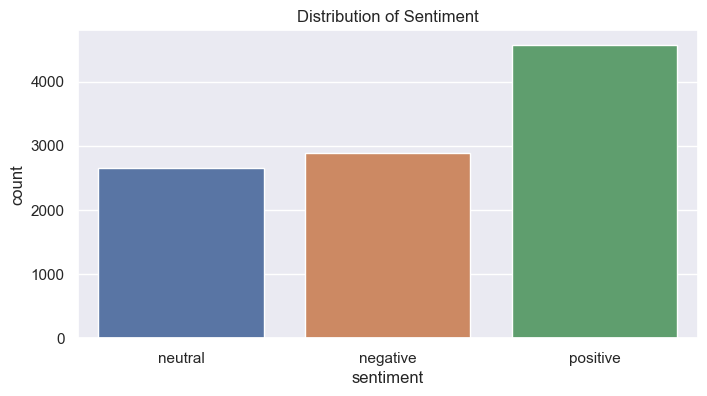

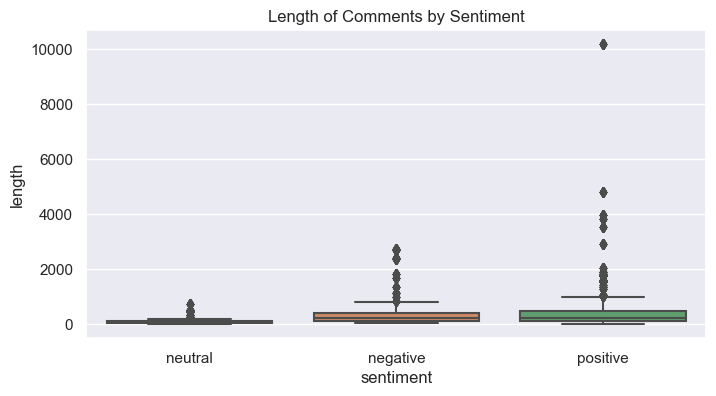

t-statistic: 5.429957972894398
p-value: 5.814391629263611e-08


In [101]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


# Perform sentiment analysis
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
df_combined['sentiment_score'] = df_combined['Reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df_combined['sentiment'] = df_combined['sentiment_score'].apply(lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral'))
sns.set(rc={'figure.figsize':(8,4)})
# Visualize the data
sns.countplot(x='sentiment', data=df_combined)
plt.title('Distribution of Sentiment')
plt.show()



# Calculate the length of each comment
df_combined['length'] = df_combined['Reviews'].apply(len)

# Group the data by sentiment and calculate the mean length for each group
sentiment_lengths = df_combined.groupby('sentiment')['length'].mean()
sns.boxplot(x='sentiment', y='length', data=df_combined)
plt.title('Length of Comments by Sentiment')
plt.show()

t_stat_combined, p_val_combined = stats.ttest_ind(df_combined[df_combined['sentiment']=='positive']['length'], df_combined[df_combined['sentiment']=='negative']['length'])
print('t-statistic:', t_stat_combined)
print('p-value:', p_val_combined)

In [185]:
# Load the data
df_reddit1 = pd.read_csv('/Users/zihanfang/Desktop/car_website_data/submissions_reddit.csv')

print(df_reddit1.head())
print(df_reddit1.info())

# Clean the data
df_reddit1.drop_duplicates(inplace=True)
df_reddit1.dropna(inplace=True)

          subreddit                                            Reviews
0  electricvehicles  Aside from Tesla, which company currently has ...
1  electricvehicles                               Ev testing equipment
2  electricvehicles     How the Tesla Semi “Broke the Laws of Physics”
3  electricvehicles  Tata Motors goes all-out to defend EV lead in ...
4  electricvehicles     Polestar 2 | 1+ Year/40.000km Long Term Review
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12082 entries, 0 to 12081
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  12082 non-null  object
 1   Reviews    12082 non-null  object
dtypes: object(2)
memory usage: 188.9+ KB
None


In [186]:
df_reddit1

,subreddit,Reviews
0,electricvehicles,"Aside from Tesla, which company currently has ..."
1,electricvehicles,Ev testing equipment
2,electricvehicles,How the Tesla Semi “Broke the Laws of Physics”
3,electricvehicles,Tata Motors goes all-out to defend EV lead in ...
4,electricvehicles,Polestar 2 | 1+ Year/40.000km Long Term Review
...,...,...
12077,HummerEV,GMC HUMMER EV | “Revolutionary Features” | GMC
12078,HummerEV,GMC HUMMER EV | “Speed”
12079,HummerEV,GMC HUMMER EV | “Horsepower”
12080,HummerEV,GMC HUMMER EV | “Torque”


In [187]:
12052/23

524.0

In [188]:
212927/23

9257.695652173914